In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from datetime import date

In [3]:
def calculateNeighbours(location, t_size):
    # We first calculate all 9 cells in the neighbourhood,
    # and then filter out itself and the ones in the cross
    # by filtering elements with manhattan distance not equal to one.
    return list(filter(lambda x: abs(location[0]-x[0])+abs(location[1]-x[1])==1, [(x,y) for x in range(location[0]-1 if location[0]-1 > -1 else 0, location[0]+2 if location[0]+1<t_size else t_size) for y in range(location[1]-1 if location[1]-1 > -1 else 0, location[1]+2 if location[1]+1<t_size else t_size)]))

In [4]:
def generateGrid(t_size):
    # Initially all cells are set as not visited
    # 1 marks blocked, 0 marks unblocked, -1 for not visited
    grid = np.full(shape = (t_size, t_size), fill_value = -1, dtype = np.int8)

    # A random location on the grid to begin with, and mark it visited
    begin = (random.randint(0, t_size - 1), random.randint(0, t_size-1))
    grid[begin[0], begin[1]] = 1

    # Using a stack as a frontier, so we can use DFS to generate the blocked paths
    frontier = []
    frontier.append(begin)
    while(len(frontier) > 0):
        current = frontier.pop()
        # Calculating the current's neighbours
        neighbours = calculateNeighbours(current, t_size)
        for nx,ny in neighbours:
            if grid[nx,ny] == -1:
                # If the location is not visited, add it to the frontier
                frontier.append((nx,ny))
                # Mark it blocked or unblocked randomly
                grid[nx,ny] = 1 if random.random() > 0.7 else 0
    return grid

[[1 1 0 0 1 1 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 1 0 0 0]
 [0 1 1 0 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]]


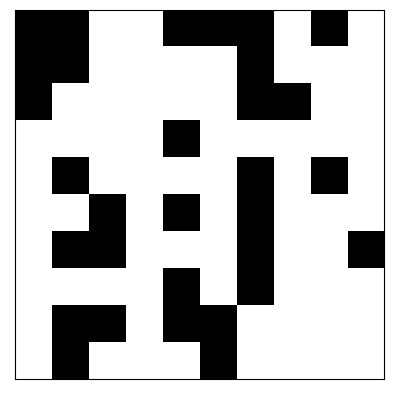

In [5]:
# TEST_WORLDS = 5
TEST_WORLD_SIZE = 10
OUTPUT_BASE_PATH = "Outputs/"
grid = generateGrid(TEST_WORLD_SIZE)
today = date.today()

print(grid)
colormap = ListedColormap(["white","black"])
plt.xticks([])
plt.yticks([])
plt.imshow(X = grid, cmap = colormap)
plt.savefig(OUTPUT_BASE_PATH + today.strftime("%d-%m-%Y") + "-plain_grid" + ".svg", bbox_inches="tight")